<a href="https://colab.research.google.com/github/Gabrielamb2/MachineLearning/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.colors import ListedColormap
import geopandas as gpd 
import folium
from folium.plugins import MarkerCluster,HeatMap,HeatMapWithTime
import branca.colormap as colormap
from collections import defaultdict

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
microplastics_path = "../98631dc5bb9a4ea5a8f9c0b4ec433290_0.csv"

In [3]:
df_microplastic = pd.read_csv(microplastics_path)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,21,22,23,24,34,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df_microplastic.shape

(54388, 83)

In [53]:
df_microplastic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,54388.0,-50.623321,77.093156,-174.018918,-95.305050,-80.051825,-2.859105,1.787333e+02
Y,54388.0,30.010745,18.598370,-62.918120,25.794118,33.710430,41.688923,7.937589e+01
OBJECTID,54388.0,27664.186751,15737.607977,1.000000,14089.750000,27686.500000,41283.250000,5.488000e+04
RecordSequenceID,54388.0,31475.197249,17860.446270,349.000000,15956.750000,31254.500000,47422.250000,6.176900e+04
Other,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude1,54388.0,-50.623321,77.093156,-174.018918,-95.305050,-80.051825,-2.859105,1.787333e+02
Latitude1,54388.0,30.010745,18.598370,-62.918120,25.794117,33.710430,41.688923,7.937589e+01
Longitude2,4539.0,-46.657097,64.739658,-174.020701,-122.942240,-2.940380,8.715379,1.664430e+02
Latitude2,4539.0,40.873333,11.318110,-36.538300,37.091500,44.633600,47.451209,6.842925e+01
TotalWidth_m,2121.0,110.759294,627.708181,0.777240,21.000000,40.000000,70.000000,9.999000e+03


In [5]:
df_microplastic.head(5).transpose()

,0,1,2,3,4
X,-123.436,-123.484,-123.456,-123.491,-124.462
Y,38.6905,38.7287,38.7132,38.7351,42.7149
OBJECTID,1,2,3,4,5
RecordSequenceID,349,351,354,358,360
UniqueID,MDP-349,MDP-351,MDP-354,MDP-358,MDP-360
...,...,...,...,...,...
Count_,1,1,1,1,1
Soft_Sheets2,0,0,0,0,0
PlasticStraps2,0,0,0,0,0
FishingGlowSticks2,0,0,0,0,0


In [6]:
df_microplastic.columns

Index(['X', 'Y', 'OBJECTID', 'RecordSequenceID', 'UniqueID', 'SourceID',
       'LocationFreqID', 'Location', 'Dataset', 'Organization', 'Other',
       'CountryName_FromSource', 'SubCountry_L1_FromSource',
       'SubCountry_L2_FromSource', 'Longitude1', 'Latitude1', 'Longitude2',
       'Latitude2', 'TotalWidth_m', 'TotalLength_m', 'TotalArea_Sq_m',
       'ShorelineName', 'WaterfrontName', 'BeachAreaLandcover', 'BeachType',
       'EventType', 'TotalVolunteers', 'DateOriginal', 'DateStandardized',
       'MonthYear', 'Year', 'MonthNum', 'Month', 'Day', 'StartTime', 'DOW',
       'FieldObsevations', 'DebrisDescription', 'Totalltems_EventRecord',
       'TotalClassifiedItems_EC2020', 'PCT_PlasticAndFoam',
       'PCT_Glass_Rubber_Lumber_Metal', 'SUM_Hard_PlasticBeverageBottle',
       'SUM_Hard_OtherPlasticBottle', 'SUM_HardOrSoft_PlasticBottleCap',
       'SUM_PlasticOrFoamFoodContainer', 'SUM_Hard_BucketOrCrate',
       'SUM_Hard_Lighter', 'SUM_OtherHardPlastic',
       'SUM_Plastic

In [11]:
rows_to_analyse = ['Location', 'Longitude1', 'Latitude1', 'Longitude2',
       'Latitude2', 'TotalWidth_m', 'TotalLength_m', 'TotalArea_Sq_m', 'Year', 'MonthNum', 
        'Totalltems_EventRecord',
       'TotalClassifiedItems_EC2020', 'PCT_PlasticAndFoam',
       'PCT_Glass_Rubber_Lumber_Metal', 'SUM_Hard_PlasticBeverageBottle']

df = df_microplastic[df_microplastic.columns.intersection(rows_to_analyse)]
df.head(5).transpose()

,0,1,2,3,4
Location,"Blackpoint Beach, Sonoma, CA, United States","Dune Drift Beach, Sonoma, CA, United States","Ohlson Beach, Sonoma, CA, United States","Walk On Beach, Sonoma, CA, United States","Rocky Point, Curry, OR, United States"
Longitude1,-123.436,-123.484,-123.456,-123.491,-124.462
Latitude1,38.6905,38.7287,38.7132,38.7351,42.7149
Longitude2,-123.433,-123.488,-123.455,-123.49,-124.462
Latitude2,38.6892,38.7333,38.7106,38.7319,42.7139
TotalWidth_m,11.887,10,65,56,27.5
TotalLength_m,898,190.5,309,300,102
TotalArea_Sq_m,NaN,NaN,NaN,NaN,NaN
Year,2015,2015,2015,2015,2015
MonthNum,1,1,1,1,1


In [46]:
df['Longitude'] = (df['Longitude1'] + df['Longitude2']) / 2 
df['Latitude'] = (df['Latitude1'] + df['Latitude2']) / 2 

In [50]:
df = df.drop(columns=['Longitude1', 'Longitude2', 'Latitude1', 'Latitude2'])

In [51]:
df.head().transpose()

,0,1,2,3,4
Location,"Blackpoint Beach, Sonoma, CA, United States","Dune Drift Beach, Sonoma, CA, United States","Ohlson Beach, Sonoma, CA, United States","Walk On Beach, Sonoma, CA, United States","Rocky Point, Curry, OR, United States"
TotalWidth_m,11.887,10,65,56,27.5
TotalLength_m,898,190.5,309,300,102
TotalArea_Sq_m,NaN,NaN,NaN,NaN,NaN
Year,2015,2015,2015,2015,2015
MonthNum,1,1,1,1,1
Totalltems_EventRecord,28,19,0,11,906
TotalClassifiedItems_EC2020,24,17,0,8,893
PCT_PlasticAndFoam,85.7,89.5,0,72.7,98.6
PCT_Glass_Rubber_Lumber_Metal,14.3,10.5,0,27.3,1.4


In [44]:
(df.Totalltems_EventRecord).mean()

2551.8887070677356

No handles with labels found to put in legend.


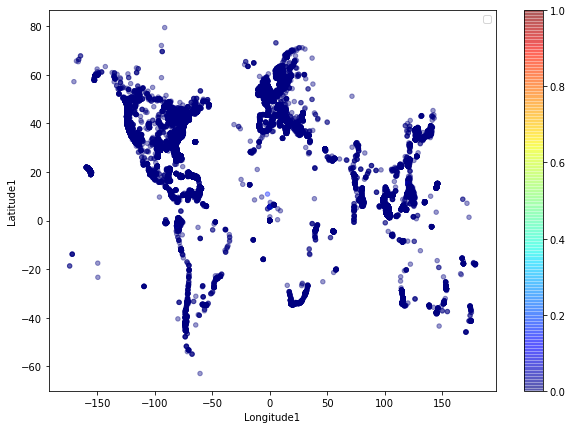

In [42]:
df.plot(
    kind='scatter',
    x='Longitude1',
    y='Latitude1',
#     s="Level 2p",
    c=df.Totalltems_EventRecord / max(df.Totalltems_EventRecord),
    cmap=plt.get_cmap('jet'),
    colorbar=True,
    figsize=(10, 7),
    alpha=0.4,
    sharex=False,
)
plt.legend()
plt.show()

In [17]:
df = df[~df['Year'].isnull()]
df.shape

(54388, 15)

In [61]:
df.groupby('Year').size()

Year
2015     1933
2016    11141
2017    16529
2018    24785
dtype: int64

In [39]:

start_loc= (np.mean(df['Latitude1']),np.mean(df['Longitude1']))

terrain_map = folium.Map(location=start_loc,
              zoom_start=2,
              tiles='Open Street Map')

data_dict= defaultdict(list)

# data_dict= {}

for row in df.itertuples():
    data_dict[float(str(int(row.Year)) +'.'+ str(int(row.MonthNum)))].append([row.Latitude1, row.Longitude1])

lat_interval = 15
lon_interval = 15

for lat in range(-90, 91, lat_interval):
     folium.PolyLine([[lat, -180],[lat, 180]], weight=0.5).add_to(terrain_map)

for lon in range(-180, 181, lon_interval):
    folium.PolyLine([[-90, lon],[90, lon]], weight=0.5).add_to(terrain_map)

    
    
heatmap=HeatMapWithTime(data=list(data_dict.values()),
                index=list(data_dict.keys()),
                radius=10,
                min_opacity=0.1,
                max_opacity=0.6,
                auto_play=True,
               control=True,
                show=True).add_to(terrain_map)

terrain_map

## Fontes
https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/

https://gis.stackexchange.com/questions/378592/adding-graticules-to-folium-map

https://www.kaggle.com/code/virajkadam/marine-plastic-visualization#Exploratory-Data-Analysis

## Dataset

https://cscloud-ec2020.opendata.arcgis.com/datasets/2e4ea3959913412f8efb0e7f63e46544_0/about
    
https://docs.google.com/spreadsheets/d/10LGR3hAnZNt0Ilpn-M8YuOTjo17WTOPDOUZUR2Aq1Pg/edit#gid=1401383882